# **Proyecto Python**

Programar un sistema donde interactivamente expliquen uno de los algoritmos vistos en clase [80%], esta parte es en equipos y no pueden elegir el mismo algoritmo dos equipos entonces hablen y avisenme a más tardar mañana miércoles 13.

In [0]:
# Paquetes e importaciones necesarios
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from   sklearn.cluster import KMeans
from   sklearn import datasets 
from   sklearn.metrics import pairwise_distances_argmin_min

# Se carga el archivo sobre características de algunos vinos dentro de la variable datos
datos = pd.read_csv('https://raw.githubusercontent.com/rociochavezmx/Rocio-Chavez-youtube-Files/master/caracteristicas%20de%20vinos.csv')
# Se muestra la información específica que contiene la variable datos
datos.info()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Vino             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [0]:
# Mostramos los primeros 5 datos que almacena el variable (dataframe) datos
datos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [0]:
# Asignamos a una nueva variable llamada datos_variables los datos de la variable datos y
# le quitamos la columna 'vinos' porque nos interesan solo las características estadísticas
datos_variables=datos.drop(['Vino'], axis=1)

In [0]:
# Mostramos la descripción estadística contenida dentro de datos_variables
datos_variables.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [0]:
# Generamos una nueva variable llamada datos_normalizados que tenga asignado los todos 
# los valores de las columnas que tengan un valor entre 0 y 1
datos_normalizados = (datos_variables-datos_variables.min())/(datos_variables.max()-datos_variables.min())

In [0]:
# Volvemos a describir los datos estadísticos pero ahora de la variable datos_normalizados
datos_normalizados.describe()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
# Buscamos el mejor numero de clusters, partiendo de ello de crear una lista vacía llamada
# suma_cuadrados, la cual permitira ir almacenando como su nombre lo indica, la suma de cuadrados
# del algoritmo kmeans
suma_cuadrados = []

# El rango de 1 a 11 es el numero de clusters
for i in range(1,11):
  kmeans=KMeans(n_clusters = i, max_iter=300)
  kmeans.fit(datos_normalizados)
  # inertia_ hace la suma de los cuadrados de las distancias del centro de cada cluster 
  suma_cuadrados.append(kmeans.inertia_)

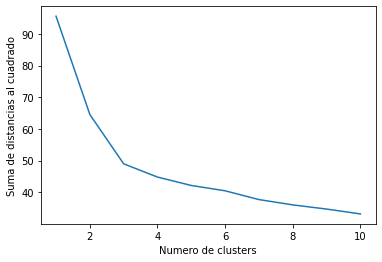

In [0]:
# Relizamos su debida representación gráfica
plt.plot(range(1,11),suma_cuadrados)
plt.xlabel('Numero de clusters')
plt.ylabel('Suma de distancias al cuadrado')
plt.show()

In [0]:
# A los 3 clusters la gráfica tiene su punto de inflexión por lo que es el numero adecuado de grupos 
clustering= KMeans(n_clusters=3, max_iter=300)
clustering.fit(datos_normalizados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#Agregamos a la tabla original los clusters
datos['KMeans_Clusters'] = clustering.labels_
datos.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,KMeans_Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [0]:
# Con PCA reducimos las columnas a un numero graficable, en este caso una gráfica 2d
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_datos = pca.fit_transform(datos_normalizados)
pca_datos_df = pd.DataFrame(data=pca_datos, columns = ['Componente_1', 'Componente_2'])
pca_nombres_datos = pd.concat([pca_datos_df, datos[['KMeans_Clusters']]], axis=1)

# Mostramos los datos de pca_nombres_datos
pca_nombres_datos

,Componente_1,Componente_2,KMeans_Clusters
0,-0.706336,-0.253193,0
1,-0.484977,-0.008823,0
2,-0.521172,-0.189187,0
3,-0.821644,-0.580906,0
4,-0.202546,-0.059467,0
...,...,...,...
173,0.739510,-0.471901,1
174,0.581781,-0.348366,1
175,0.626313,-0.546857,1
176,0.572991,-0.425516,1


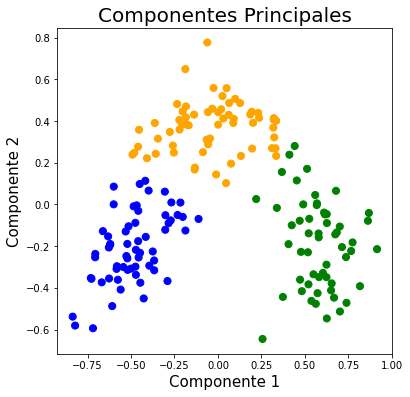

In [0]:
# Realizamos su debida graficación primero asignando la representación gráfica a una
# variable llamada fig, la cual será parametrizada y modificada para una mejor comprensión
fig = plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme=np.array(["blue","green", "orange"])
ax.scatter(x=pca_nombres_datos.Componente_1, y= pca_nombres_datos.Componente_2, c=color_theme[pca_nombres_datos.KMeans_Clusters], s=50)
plt.show()

In [0]:
# Realizamos las importaciones faltantes necesarias donde se
# emplea el módulo tkinter para realizar una interfaz gráfica
import tkinter as tk
from   tkinter import ttk
from   matplotlib.backends.backend_tkagg import 
(FigureCanvasTkAgg, NavigationToolbar2Tk)

In [0]:
window = tk.Tk()

#Se ponene las características de la ventana
window.title("KMEANS")
window.geometry('1200x600')
window.config(background = "aqua")

#Tipo de ventana con tabs
tab_control = ttk.Notebook(window)

#Se declaran las tabs que habrá en la ventana
tab1 = tk.Frame(tab_control)
tab1.config(background = 'aqua')
tab2 = tk.Frame(tab_control)
tab2.config(background = 'aqua')
tab3 = tk.Frame(tab_control)

#Se pone el texto de las tabs
tab_control.add(tab1, text= 'Equipo')
tab_control.add(tab2, text='Bienvenido')
tab_control.add(tab3, text='Gráfica')

#Contenido de la tab1
lbl2 = tk.Label(tab1, text="Alvarez Loran Juan Pablo \n Barreiro Valdes Alejandro \n Chilpa Navarro Martin Enrique \n Espinosa Guadarrama Arturo \n Lagunas Parra Ana Paola.", font=("Arial",24),padx=80, pady=200, fg= 'white', bg= 'aqua')
lbl2.pack()

#Contenido de la tab2
lbl1 = tk.Label(tab2, text="Bienvenido a la explicación de KMeans.", font=("Arial",26), padx=30, pady=30, bg= 'aqua', fg = 'white')
lbl1.pack()
lbl2 = tk.Label(tab2, text="El algoritmo de KMeans es utilizado para separar \n n observaciones en k clusters. Cada observación pertenece \n al grupo cuyo valor medio sea el más acercado.", font=("Arial",16), bg= 'aqua')
lbl2.pack()
lbl3 = tk.Label(tab2, text="En este caso se tomo como base el caso de las caracteristicas de ciertos vinos \n para despues clasificarlos de acuerdo al número óptimo de clusters. \n El número de clusters nos respresento la cantidad de grupos necesarios y consideramos \n importante la investigación de este tipo de situaciones\n pues son cosas de las que no estamos informados adecuadamente", 
            font=("Arial",16), padx=80, pady=100, bg = 'aquamarine')
lbl3.pack()

#Contenido de la tab3
canvas = FigureCanvasTkAgg(fig, master=tab3)
canvas.draw()
canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

tab_control.pack(expand=1, fill='both')

window.mainloop()

TclError: ignored

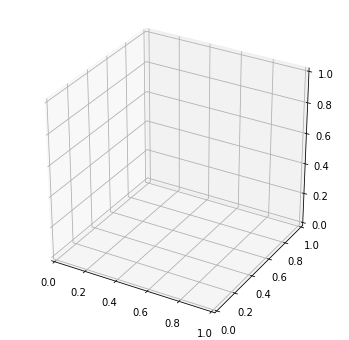

In [0]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# Creamos la figura
fig = plt.figure(figsize=(6,6))
# Creamos el plano 3D
ax1 = fig.add_subplot(1,1, 1, projection='3d')

x = [1,2,3,4,5,6,7,8,9,10]
y = [5,6,7,8,2,5,6,3,7,2]
z = [1,2,6,3,2,7,3,3,7,2]

# Datos adicionales
x2 = [-1,-2,-3,-4,-5,-6,-7,-8,-9,-10]
y2 = [-5,-6,-7,-8,-2,-5,-6,-3,-7,-2]
z2 = [1,2,6,3,2,7,3,3,7,2]

ax.set_xlabel('Componente 1', fontsize=15)
ax.set_ylabel('Componente 2', fontsize=15)
ax.set_title('Componentes Principales', fontsize=20)

color_theme=np.array(["blue","green", "orange"])
ax.scatter(x=pca_nombres_datos.Componente_1, y= pca_nombres_datos.Componente_2, c=color_theme[pca_nombres_datos.KMeans_Clusters], s=50)
plt.show()